# **Assignment V**

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

##  1. **Load Data ("Online_Retail.csv") **

In [15]:
#df = pd.read_excel("D:/Data Science for Marketing-I/data/Online Retail.xlsx")


In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **2. Data Preparation**

#### - Handle NaNs in CustomerID field

In [17]:
df['CustomerID'].describe()

count    397884.000000
mean      15294.423453
std        1713.141560
min       12346.000000
25%       13969.000000
50%       15159.000000
75%       16795.000000
max       18287.000000
Name: CustomerID, dtype: float64

### Find the number of NaNs

In [18]:
df['CustomerID'].isna().sum()

np.int64(132220)

### Drop all NaNs in CustomerID

In [19]:
df =df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

### Calculate and visualize Number of Quantity sold per Product  ***Hint: Groupby accoding to "Description" & Arrange by "Quantity"***

In [20]:
quantity_per_Product =df.groupby("Description")["Quantity"].sum().reset_index()
quantity_per_Product = quantity_per_Product.sort_values(by="Quantity", ascending=False)
quantity_per_Product

,Description,Quantity
2387,"PAPER CRAFT , LITTLE BIRDIE",80995
2052,MEDIUM CERAMIC TOP STORAGE JAR,78033
3934,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
1816,JUMBO BAG RED RETROSPOT,48474
3844,WHITE HANGING HEART T-LIGHT HOLDER,37891
...,...,...
472,BLUE NEW BAROQUE FLOCK CANDLESTICK,1
2535,PINK FEATHER CHRISTMAS DECORATION,1
3280,SET/6 IVORY BIRD T-LIGHT CANDLES,1
2518,PINK CRYSTAL GUITAR PHONE CHARM,1


### Make a Scatter plot to display the above result

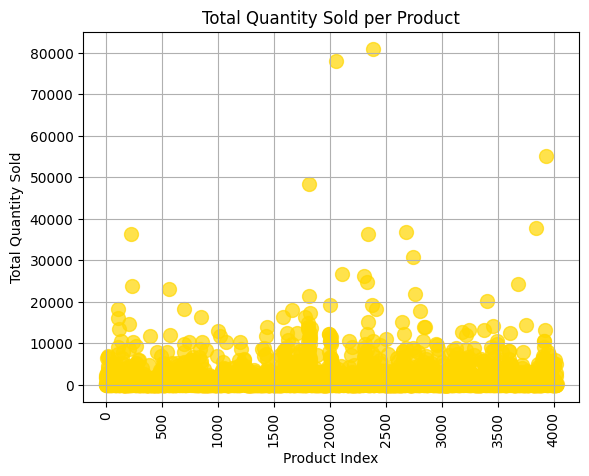

In [21]:
plt.scatter(quantity_per_Product.index, quantity_per_Product["Quantity"], color='gold', marker='o', s=100, alpha=0.7)
plt.xlabel('Product Index')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Product')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Interpertation:
Majority of Products Have Low Sales: Most products have total quantities sold concentrated near the lower end of the y-axis, indicating relatively low sales for a large number of products.

Presence of Outliers: A few products have significantly higher sales, with quantities exceeding 20,000 and even reaching above 80,000. These represent exceptional performers or "bestsellers."

Wide Range of Sales: The total quantities sold vary greatly, highlighting a disparity between top-performing products and the rest.

### Display the above information as Bar plot

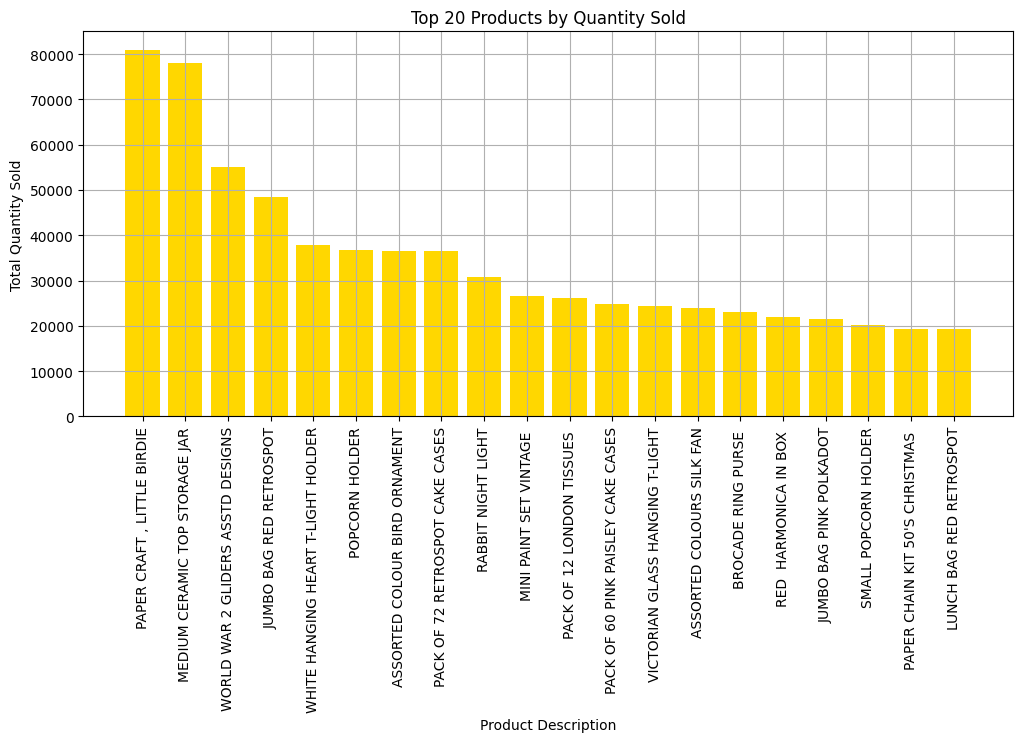

In [22]:
plt.figure(figsize=(12, 5))
plt.bar(quantity_per_Product["Description"][:20], quantity_per_Product["Quantity"][:20], color='gold')  # Display top 20 for better readability
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 20 Products by Quantity Sold')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Interpertation:
The chat describe that home decor, storage solutions, vintage-style products, and giftable items (like ornaments and purses) are among the most popular. Additionally, a few top-performing items contribute disproportionately to total sales

### Find which invoice has maximum number of Products

In [23]:
Product_count_per_invoice =df.groupby('InvoiceNo')["Quantity"].sum().sort_values(ascending=False)
Product_count_per_invoice

InvoiceNo
581483    80995
541431    74215
556917    15049
563076    14730
574941    14149
          ...  
575162        1
574309        1
573933        1
573586        1
573669        1
Name: Quantity, Length: 19960, dtype: int64

### Display the above information as Bar plot

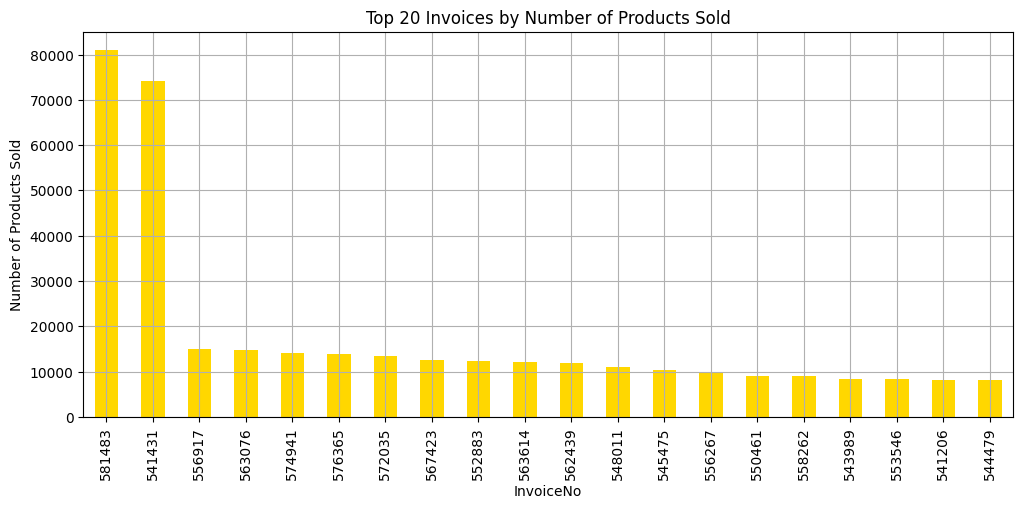

In [24]:
plt.figure(figsize=(12, 5))
Product_count_per_invoice[:20].plot(kind='bar', color='gold')  # Display top 20 invoices
plt.xlabel('InvoiceNo')
plt.ylabel('Number of Products Sold')
plt.title('Top 20 Invoices by Number of Products Sold')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

interpertation:
The top two invoices (581483 and 541431) show an exceptionally high number of products sold (above 70,000 units each).
These two invoices contribute disproportionately to the total sales, significantly outpacing the rest.that a few invoices contribute significantly to the total products sold, with a sharp drop afterward. This suggests the presence of high-value bulk orders alongside regular large transactions. Understanding the nature of these top invoices (e.g., wholesale buyers vs. retail customers) could provide strategic insights for sales optimization.

### Identify the top 10 customers who have made the highest number of product purchases

In [25]:

Product_count_per_customer=df.groupby('CustomerID')["Quantity"].sum().sort_values(ascending=False)
Product_count_per_customer.head(10)

CustomerID
14646.0    196915
16446.0     80997
14911.0     80265
12415.0     77374
12346.0     74215
17450.0     69993
17511.0     64549
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64

Interpretation:

The data indicates that a small group of customers, especially Customer 14646.0, contribute disproportionately to total sales. Understanding their buying patterns can help in optimizing inventory, pricing strategies, and customer retention efforts.

### Display the above information with Bar plot





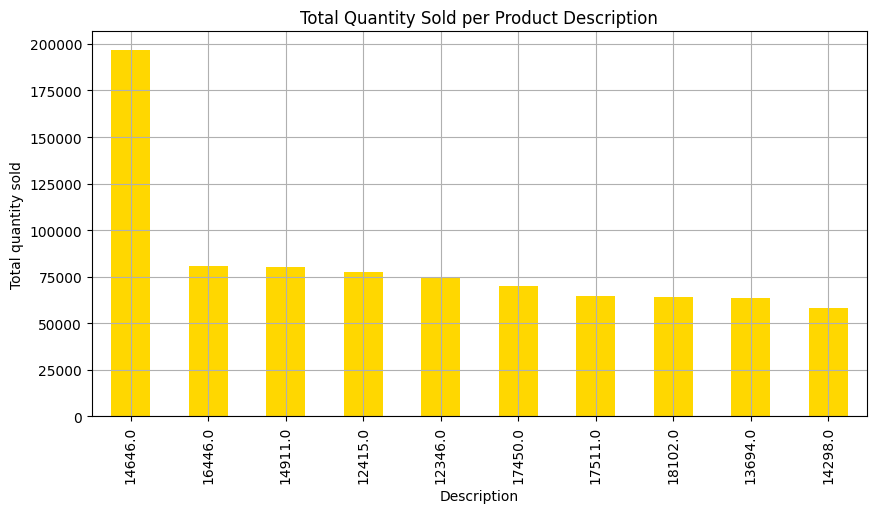

In [26]:
plt.figure(figsize=(10, 5))
Product_count_per_customer.head(10).plot(kind='bar', color='gold')
plt.xlabel('Description')
plt.ylabel('Total quantity sold')
plt.title('Total Quantity Sold per Product Description')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Interpertation:

The first product (ID 14646.0) has a significantly higher quantity sold, nearing 200,000 units, which is more than twice the sales of any other product.

The next few products (IDs 16446.0, 14911.0, 12415.0) have sales between 70,000–80,000 units, showing a substantial gap between the first and the rest.